Assignment 1
Sentiment Analysis on "What can
public opinion on Twitter tell us about the Canadian political landscape in 2015?"

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Part 1: Data Cleaning for Unclassified_tweets

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
import re 
import html

In [10]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
...                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
...                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
...                             pd.NaT]})

In [12]:
df.dropna()

,born,name,toy
1,1940-04-25,Batman,Batmobile


In [2]:
tweets = pd.read_csv('unclassified_tweets.txt',sep="\n",names=["text"])

In [3]:
tweets.head()

,text
0,living the dream. #cameraman #camera #camerace...
1,justin #trudeau's reasons for thanksgiving. to...
2,@themadape butt…..butt…..we’re allergic to l...
3,2 massive explosions at peace march in #turkey...
4,#mulcair suggests there’s bad blood between hi...


In [4]:
tweets.text

0       living the dream. #cameraman #camera #camerace...
1       justin #trudeau's reasons for thanksgiving. to...
2       @themadape   butt…..butt…..we’re allergic to l...
3       2 massive explosions at peace march in #turkey...
4       #mulcair suggests there’s bad blood between hi...
5       #polqc on se sort de la marde avec #harper et ...
6       harper gave $8m to help other countries' get r...
7                                     tommy taylor added,
8                          @justintrudeau? @thomasmulcair
9                                 tracy s retweeted tsec 
10      icymi: @lylegreg is predicting a @liberal_part...
11      cbc.ca/news/canada/ottawa/canada-election-2015...
12                                                 #pjnet
13      if cop told sex assault prevention students 2 ...
14                                           @billhillier
15       it. pls canada, let's not keep a thug in offi...
16             #ready4change #ndp #tm4pm fb.me/53nxi25ue 
17      can yo

In [5]:
# define a function where we can go through each tweet and perform data cleaning
def tweets_to_words( raw_tweet ):
    # Function to convert a raw tweet to a string of words
    # The input is a single string (a raw tweet), and 
    # the output is a single string (a preprocessed tweet)
    #
    # 1. Remove HTML
    tweet_text = BeautifulSoup(raw_tweet).get_text() 
    
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", tweet_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # 4. Remove the html tags and attributes
    tweet_tags = [re.sub("<.*?>", "", tweet) for tweet in words]
    
    # 5. Remove the urls 
    tweets_urls = [re.sub(r"http\S+", "", tweet) for tweet in tweet_tags]
    
    # 6. Remove all html characters to ASCII value
    tweets_char = [html.unescape(tweet) for tweet in tweets_urls]
    
    # 7. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
     
    # 8. Remove stop words
    meaningful_words = [w for w in tweets_char if not w in stops]   
    
    # 9. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [6]:
# Get the number of tweets based on the dataframe column size
num_data = tweets["text"].size

# Initialize an empty list to hold the clean tweets
clean_tweets = []

# Loop over each tweet; create an index i that goes from 0 to the length
# of the tweets list 
for i in range( 0, num_data ):
    # Call our function for each one, and add the result to the list of
    # clean training data
    clean_tweets.append( tweets_to_words( tweets["text"][i] ) )

C:\Users\Nathan\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Nathan\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [7]:
clean_tweets = pd.DataFrame(data=clean_tweets,columns=["text"])
clean_tweets

,text
0,living dream cameraman camera cameraception ca...
1,justin trudeau reasons thanksgiving today mont...
2,themadape butt butt allergic latex makes us sn...
3,massive explosions peace march turkey killed t...
4,mulcair suggests bad blood trudeau worldwidehe...
5,polqc se sort de la marde avec harper et pr re...
6,harper gave help countries get right wing govt...
7,tommy taylor added
8,justintrudeau thomasmulcair
9,tracy retweeted tsec


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Part 2: Exploratory analysis

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [8]:
# Have the tweets stored in a list, easy to loop through
clean_tweets_list= clean_tweets['text'].tolist()

In [9]:
# Create counter variable for the three biggest political parties
countLib = 0
countConserv = 0
countDemo = 0

# Loop through the list of tweets, add one to counter countLib for each tweet
# with the word trudeau,liberal or justin
for tweet in clean_tweets_list:
        if "trudeau" in tweet:
            countLib += 1
        elif "liberal" in tweet:
            countLib += 1
        elif "lib" in tweet:
            countLib += 1
        elif "justin" in tweet:
            countLib += 1

# Loop through the list of tweets, add one to counter countConserv for each tweet
# with the word harper,conservative or stephen            
for tweet in clean_tweets_list:
        if  "harper"  in tweet:
            countConserv +=1
        elif "conservative" in tweet:
            countConserv +=1
        elif "stephen" in tweet:
            countConserv +=1

# Loop through the list of tweets, add one to counter countDemo for each tweet
# with the word mulcair,democratic,thomas or NDP
for tweet in clean_tweets_list:
        if  "mulcair" in tweet:
            countDemo += 1
        elif "democratic" in tweet:
            countDemo += 1
        elif "thomas" in tweet:
            countDemo += 1
        elif "NDP" in tweet:
            countDemo += 1

# Print out the counter variables
print("Liberal", countLib)
print("Conservative", countConserv)
print("New Democratic", countDemo)

# Print out the number of tweets that doesn't have the above sensitive words
# which usually represents tweets not on the political parties or other small parties
countOther=len(tweets)-countLib-countConserv-countDemo
print("Other Tweets", len(tweets)-countLib-countConserv-countDemo)

Liberal 698
Conservative 652
New Democratic 297
Other Tweets 1379


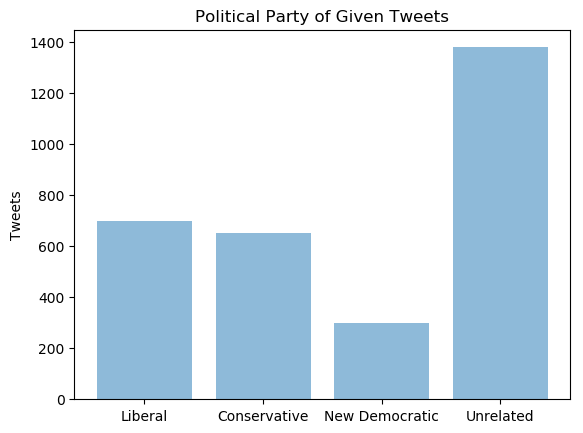

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Liberal', 'Conservative', 'New Democratic','Unrelated')
y_pos = np.arange(len(objects))
performance = [countLib,countConserv,countDemo,countOther]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tweets')
plt.title('Political Party of Given Tweets')
 
plt.show()


From the graph, we can tell that the two highest commented political parties on twitter are Liberal and Conservative where the Liberal Party have slightly more comments than the Conservative Party. New Democratic Party comes in third but only have almost half of the comments compared to the biggest two. 

In [11]:
# Use the read_csv() function from pandas and save the data to "train", I would like to see who was the most @ person
train = pd.read_csv('classified_tweets.txt',sep=",",header = 0,names=['class', 'id', 'date', 'query', 'user', 'text'])
train

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [12]:
train.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
features = ['id','date']

In [17]:
train[features]

,id,date
0,1467810369,Mon Apr 06 22:19:45 PDT 2009
1,1467810672,Mon Apr 06 22:19:49 PDT 2009
2,1467810917,Mon Apr 06 22:19:53 PDT 2009
3,1467811184,Mon Apr 06 22:19:57 PDT 2009
4,1467811193,Mon Apr 06 22:19:57 PDT 2009
5,1467811372,Mon Apr 06 22:20:00 PDT 2009
6,1467811592,Mon Apr 06 22:20:03 PDT 2009
7,1467811594,Mon Apr 06 22:20:03 PDT 2009
8,1467811795,Mon Apr 06 22:20:05 PDT 2009
9,1467812025,Mon Apr 06 22:20:09 PDT 2009


In [10]:
# getting the top 10 most @ word
text_split = pd.Series(' '.join(train['text']).lower().split())
hash_tags=[text for text in text_split if "@" in text]
pd.Series(hash_tags).value_counts()[:10]

@                   1313
@mileycyrus          605
@tommcfly            449
@ddlovato            414
@jonathanrknight     246
@donniewahlberg      162
@davidarchie         159
@jonasbrothers       156
@stephenfry          145
@nick_carter         140
dtype: int64

In [11]:
# Check and see how many people have positive attitude towards Miley Cyrus
mileycyrus_tweets = train[train['text'].str.contains("mileycyrus")]
mileycyrus_Positive=np.sum(mileycyrus_tweets['class'])/4

# Check and see how many people have negative attitude towards Miley Cyrus
mileycyrus_Negative=len(mileycyrus_tweets['class'])-mileycyrus_Positive

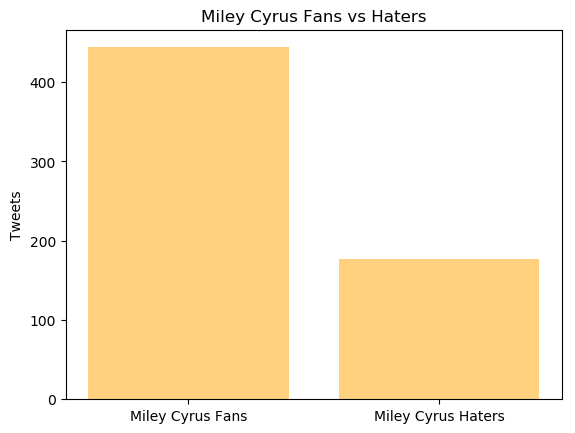

In [12]:
# Plot the graph from classifed tweets to show fans vs haters graph
objects = ['Miley Cyrus Fans','Miley Cyrus Haters']
y_pos = np.arange(len(objects))
performance = [mileycyrus_Positive,mileycyrus_Negative]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color="orange")
plt.xticks(y_pos, objects)
plt.ylabel('Tweets')
plt.title('Miley Cyrus Fans vs Haters')
 
plt.show()


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Part 3 Model Preparation

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [13]:
# Use the read_csv() function from pandas and save the data to "train"
train = pd.read_csv('classified_tweets.txt',sep=",",header = 0,names=['class', 'id', 'date', 'query', 'user', 'text'])
train

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [19]:
train.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [25]:
lala = ['id','date']

In [27]:
train[['id','date']]

,id,date
0,1467810369,Mon Apr 06 22:19:45 PDT 2009
1,1467810672,Mon Apr 06 22:19:49 PDT 2009
2,1467810917,Mon Apr 06 22:19:53 PDT 2009
3,1467811184,Mon Apr 06 22:19:57 PDT 2009
4,1467811193,Mon Apr 06 22:19:57 PDT 2009
5,1467811372,Mon Apr 06 22:20:00 PDT 2009
6,1467811592,Mon Apr 06 22:20:03 PDT 2009
7,1467811594,Mon Apr 06 22:20:03 PDT 2009
8,1467811795,Mon Apr 06 22:20:05 PDT 2009
9,1467812025,Mon Apr 06 22:20:09 PDT 2009


In [14]:
# Now I would like to clean the text data in text column for the classified text data just like before
 
# Get the number of tweets based on the dataframe column size
num_train_data = train["text"].size

# Initialize an empty list to hold the clean tweets
clean_train_tweets = []

# Loop over each tweet; create an index i that goes from 0 to the length
# of the tweet list 
for i in range( 0, num_train_data ):
    # Call our tweets clearning function created before for each tweet, and add the result to the list of
    # clean train data
    clean_train_tweets.append( tweets_to_words( train["text"][i] ) )


C:\Users\Nathan\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Nathan\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [15]:
clean_train_tweets

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day',
 'upset update facebook texting might cry result school today also blah',
 'kenichan dived many times ball managed save rest go bounds',
 'whole body feels itchy like fire',
 'nationwideclass behaving mad see',
 'kwesidei whole crew',
 'need hug',
 'loltrish hey long time see yes rains bit bit lol fine thanks',
 'tatiana k nope',
 'twittera que muera',
 'spring break plain city snowing',
 'pierced ears',
 'caregiving bear watch thought ua loss embarrassing',
 'octolinz counts idk either never talk anymore',
 'smarrison would first gun really though zac snyder doucheclown',
 'iamjazzyfizzle wish got watch miss iamlilnicki premiere',
 'hollis death scene hurt severely watch film wry directors cut',
 'file taxes',
 'lettya ahh ive always wanted see rent love soundtrack',
 'fakerpattypattz oh dear drinking forgotten table drinks',
 'alydesigns day get much done',
 'one friend called asked meet mid valley today 

In [16]:
# Need to create bag of words to show frequency of each word occuring
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
# I only need 5000 words used as variables
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_tweets)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [17]:
# Check if I have the correct dataframe size
print(train_data_features.shape)

(200000, 5000)


In [18]:
# Create a list of all the vocabulary of the 5000 words
vocab = vectorizer.get_feature_names()
print (vocab)

['aaah', 'aah', 'aaron', 'abandoned', 'abc', 'ability', 'abit', 'able', 'absolute', 'absolutely', 'abt', 'ac', 'accent', 'accept', 'accepted', 'access', 'accident', 'accidentally', 'accomplished', 'according', 'account', 'accounts', 'ace', 'ache', 'aches', 'aching', 'ack', 'acoustic', 'across', 'act', 'acting', 'action', 'active', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'added', 'addict', 'addicted', 'addicting', 'addiction', 'addictive', 'adding', 'address', 'admin', 'admit', 'adobe', 'adorable', 'adore', 'ads', 'adult', 'advantage', 'adventure', 'adventures', 'advice', 'afford', 'afraid', 'africa', 'afternoon', 'afterwards', 'age', 'agenda', 'agent', 'ages', 'agh', 'ago', 'agree', 'agreed', 'ah', 'aha', 'ahah', 'ahaha', 'ahead', 'ahem', 'ahh', 'ahhh', 'ahhhh', 'ahhhhh', 'ai', 'aid', 'aim', 'aint', 'air', 'airport', 'aka', 'ako', 'al', 'alan', 'alarm', 'alas', 'album', 'albums', 'alcohol', 'alex', 'alexalltimelow', 'ali', 'alice', 'aliens', 'alive', 'allen', 'allergic', 'a

In [19]:
# Create a dataframe with the 5000 words as columns and frequency of occurances as its values
train_test_data=pd.DataFrame(data=train_data_features,columns=vocab)
train_test_data

,aaah,aah,aaron,abandoned,abc,ability,abit,able,absolute,absolutely,...,yup,zac,zack,zackalltimelow,zealand,zero,zombie,zombies,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Import libraries for generating logistic models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
try:
    from sklearn.model_selection import GridSearchCV
except:
    from sklearn.grid_search import GridSearchCV
try:
    from sklearn.model_selection import learning_curve
except:
    from sklearn.learning_curve import learning_curve

In [18]:
# Split the train_test_data to 70% Training Data and 30% Testing Data with train_test_split() function
# Have X variable as the matrix without Sentiment Analysis Result
# and y variable with the Sentiment Analysis Result
X = train_test_data
y = train['class']
# Split X and y to X_train,y_train and X_test,y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

NameError: name 'train_test_data' is not defined

In [22]:
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.5]}

# Use classification accuracy to compare parameter combinations
acc_scorer_lg = make_scorer(accuracy_score)

# Run a grid search for the Logistic Regression classifier and all the selected parameters
grid_obj_lg = GridSearchCV(lg, parameters, scoring=acc_scorer_lg)
grid_obj_lg = grid_obj_lg.fit(X_train, y_train)

# Set our classifier, lg, to have the best combination of parameters
lg = grid_obj_lg.best_estimator_

# Fit the selected classifier to the training data. 
lg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Part 4: Model Implementation
                                        
///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [23]:
# Apply the logistic regression model created from the training data and 
# check the accuracy rate on the testing data
predictions_lg = lg.predict(X_test)
print(accuracy_score(y_test, predictions_lg))

0.764616666667


In [24]:
# Now try to use the model on the unclassifed tweets I cleaned up earlier
# First I need to create bag of words for the unclassifed tweets
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
clean_tweets_features = vectorizer.fit_transform(clean_tweets['text'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_tweets_features = clean_tweets_features.toarray()

Creating the bag of words...



In [25]:
vocab = vectorizer.get_feature_names()
print (vocab)

['ab', 'abandoned', 'abbott', 'abc', 'abcveterans', 'able', 'aboriginal', 'abpoli', 'abroad', 'absolutely', 'abuses', 'academic', 'academics', 'access', 'accidental', 'according', 'accountability', 'accurate', 'accuses', 'acdi', 'acoyne', 'across', 'act', 'action', 'active', 'activists', 'actor', 'actress', 'actualites', 'actually', 'ad', 'ada', 'adam', 'adamscotti', 'adcock', 'add', 'added', 'adding', 'address', 'adds', 'addthis', 'admire', 'admits', 'adouci', 'ads', 'adult', 'advance', 'advanced', 'advancepoll', 'advancepolls', 'advantage', 'advocates', 'affordable', 'afn', 'afraid', 'afterexposure', 'age', 'agent', 'agree', 'agreed', 'agreement', 'ah', 'ahead', 'ai', 'aid', 'aidan', 'aide', 'aim', 'ajax', 'aka', 'al', 'alanabowker', 'alaska', 'alberta', 'albertaardvark', 'alert', 'alerts', 'alex', 'alexander', 'alexboutilier', 'allanelaine', 'allen', 'allow', 'almost', 'already', 'also', 'alternative', 'alternatives', 'althiaraj', 'always', 'alxandr', 'amazing', 'ambitious', 'americ

In [26]:
# Create a dataframe with the 5000 words as columns and frequency of occurances as its values
unclassified_data=pd.DataFrame(data=clean_tweets_features,columns=vocab)
unclassified_data

,ab,abandoned,abbott,abc,abcveterans,able,aboriginal,abpoli,abroad,absolutely,...,zurtst,zuwc,zuylxih,zv,zvglik,zw,zwa,zwb,zwrv,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Predicte the semtiment analysis of the unclassified data using the logistic regression model
predictions= lg.predict(unclassified_data)/4
predictions

array([ 1.,  0.,  0., ...,  0.,  1.,  1.])

In [28]:
# Create a column of the positive or negative sentiment analysis for the unclassified tweets
clean_tweets['class']=predictions
clean_tweets

,text,class
0,living dream cameraman camera cameraception ca...,1.0
1,justin trudeau reasons thanksgiving today mont...,0.0
2,themadape butt butt allergic latex makes us sn...,0.0
3,massive explosions peace march turkey killed t...,0.0
4,mulcair suggests bad blood trudeau worldwidehe...,1.0
5,polqc se sort de la marde avec harper et pr re...,0.0
6,harper gave help countries get right wing govt...,0.0
7,tommy taylor added,1.0
8,justintrudeau thomasmulcair,1.0
9,tracy retweeted tsec,0.0


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Part 5: Discussion

For this part, I would like to seperative the tweets to different political parties and sum up the positive tweets as well as the negative tweets. From which we can compare which party has the highest supportive tweets and which party has the lowest support

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [29]:
# Find the tweets about liberals
liberal_tweets1 = clean_tweets[clean_tweets['text'].str.contains("liberal")]
liberal_tweets2 = clean_tweets[clean_tweets['text'].str.contains("justin")]
liberal_tweets3 = clean_tweets[clean_tweets['text'].str.contains("trudeau")]
liberal_tweets=liberal_tweets1.append(liberal_tweets2)
liberal_tweets=liberal_tweets.append(liberal_tweets3)
liberal_tweets.shape

# Find the number of positive tweets and number of negative tweets
liberal_Positive= np.sum(liberal_tweets['class'])/4
liberal_Negative= len(liberal_tweets['class'])-liberal_Positive

In [30]:
# Find the tweets about conservative
conservative_tweets1 = clean_tweets[clean_tweets['text'].str.contains("harper")]
conservative_tweets2 = clean_tweets[clean_tweets['text'].str.contains("conservative")]
conservative_tweets3 = clean_tweets[clean_tweets['text'].str.contains("stephen")]
conservative_tweets=conservative_tweets1.append(conservative_tweets2)
conservative_tweets=conservative_tweets.append(conservative_tweets3)
conservative_tweets.shape

# Find the number of positive tweets and number of negative tweets
conservative_Positive=np.sum(conservative_tweets['class'])/4
conservative_Negative= len(conservative_tweets['class'])-conservative_Positive

In [31]:
# Find the tweets about democratic
democratic_tweets1 = clean_tweets[clean_tweets['text'].str.contains("mulcair")]
democratic_tweets2 = clean_tweets[clean_tweets['text'].str.contains("democratic")]
democratic_tweets3 = clean_tweets[clean_tweets['text'].str.contains("thomas")]
democratic_tweets=democratic_tweets1.append(democratic_tweets2)
democratic_tweets=democratic_tweets.append(democratic_tweets3)
democratic_tweets.shape

#Find the number of positive tweets and number of negative tweets
democratic_Positive=np.sum(democratic_tweets['class'])/4
democratic_Negative= len(democratic_tweets['class'])-democratic_Positive

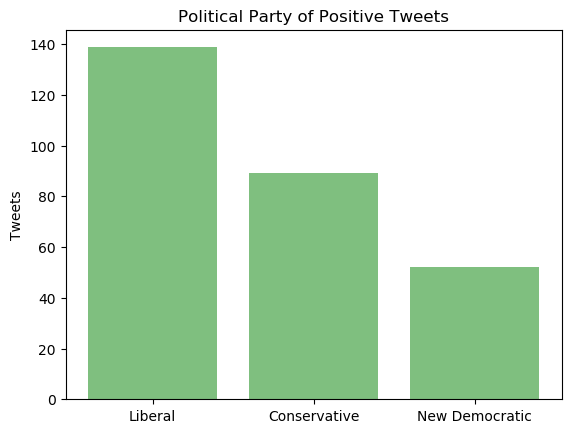

In [32]:
# Plot the number of positive tweets for each political party
objects = ('Liberal', 'Conservative', 'New Democratic')
y_pos = np.arange(len(objects))
performance = [liberal_Positive,conservative_Positive,democratic_Positive]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color="green")

plt.xticks(y_pos, objects)
plt.ylabel('Tweets')
plt.title('Political Party of Positive Tweets')
 
plt.show()

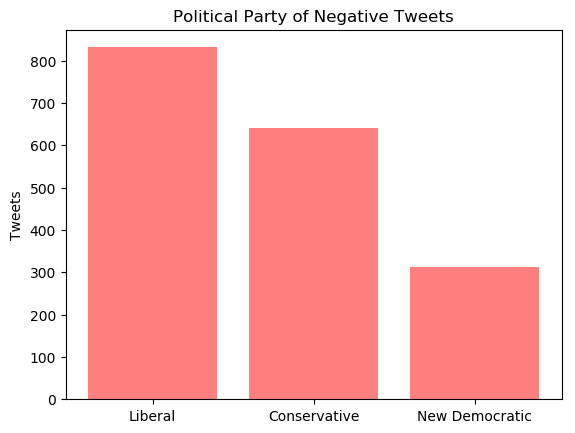

In [33]:
# Plot the number of negative tweets for each political party

objects = ('Liberal', 'Conservative', 'New Democratic')
y_pos = np.arange(len(objects))
performance = [liberal_Negative,conservative_Negative,democratic_Negative]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color="red")

plt.xticks(y_pos, objects)
plt.ylabel('Tweets')
plt.title('Political Party of Negative Tweets')
 
plt.show()

1) From both graphs we can tell the Liberal party is the most debatable politcal party of the three, having the highest positive tweets as well as the highest negative tweets. This is reasonable since Justin Trudeau may be praised by the people who hopes for young blood within the Liberal party when other critize his lack of experience as a leader.

2) Looking at the conservative party, we see that it has more negative tweets than positive tweets. The is also reasonable since Harper was judged by his lack of performance from previous act as Prime Minister.

3) New Democratic party has more positive tweets than negative tweets, however, compared to the other two political parties, the amount of attention is no where close.

4) Although causality is not the most important thing in data science, we tend to see things with casuality more than correlation. From data science point of view, Liberal Party will tend to win the election due to its high number in positive tweets and high number in negative tweets for Conservative Party

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Using randomforest classification method 

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [215]:
# I will use a different classifier called random forest classifer for this set of data

print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 20 trees
forest = RandomForestClassifier(n_estimators = 20) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

forest = forest.fit( X_train, y_train )

Training the random forest...


In [216]:
# Apply the Random Forest Regression model created from the training data and 
# check the accuracy rate on the testing data
forest.score(X_train, y_train )

0.98084285714285713

In [227]:
prediction = forest.predict(X_test)

In [228]:
accuracy_score(prediction,y_test)

0.73185

Random Forest Classifier has a higher score for the training dataset, up tp 98%. However, the accuracy_score for testing data is slightly lower comparted to the logistic regression test. These two accuracy would go higher if we use more "trees" in our classifier. Currently, I am only using 20 trees for faster computing time.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Bonous 2: Improving the performance level of my Logistic Regression Model

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [51]:
# By changing the hyperparameters "C" we can hopefully increase the accuracy of our model. 
# For this model, I changed the parameter C from 0.5 to 0.7 and immediately there's a increase in accuracy to 76.5%
lg2 = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.7]}

# Use classification accuracy to compare parameter combinations
acc_scorer_lg2 = make_scorer(accuracy_score)

# Run a grid search for the Logistic Regression classifier and all the selected parameters
grid_obj_lg2 = GridSearchCV(lg2, parameters, scoring=acc_scorer_lg)
grid_obj_lg2 = grid_obj_lg2.fit(X_train, y_train)

# Set our classifier, lg, to have the best combination of parameters
lg2 = grid_obj_lg2.best_estimator_

# Fit the selected classifier to the training data. 
lg2.fit(X_train, y_train)

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
# Apply the logistic regression model created from the training data and 
# check the accuracy rate on the testing data
predictions_lg = lg2.predict(X_test)
print(accuracy_score(y_test, predictions_lg))

0.765
